In [99]:
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy

In [100]:
data = pd.read_csv('data_spin.csv', delimiter='\t')

data.drop(columns=['Absolute acceleration (m/s^2)'])

,Time (s),Linear Acceleration x (m/s^2),Linear Acceleration y (m/s^2),Linear Acceleration z (m/s^2)
0,0.154001,-0.045400,-0.279244,0.604204
1,0.170712,-0.029882,-0.629851,0.377953
2,0.187413,-0.629978,-0.369757,-0.084796
3,0.204142,-0.114568,-0.122606,-0.107912
4,0.220840,0.461143,-0.405052,0.140370
...,...,...,...,...
574,9.877466,0.337812,0.332864,0.004906
575,9.963108,0.446498,-0.072011,-0.054361
576,9.979818,0.403679,-0.012941,0.012144
577,9.996557,0.450810,-0.035943,0.007424


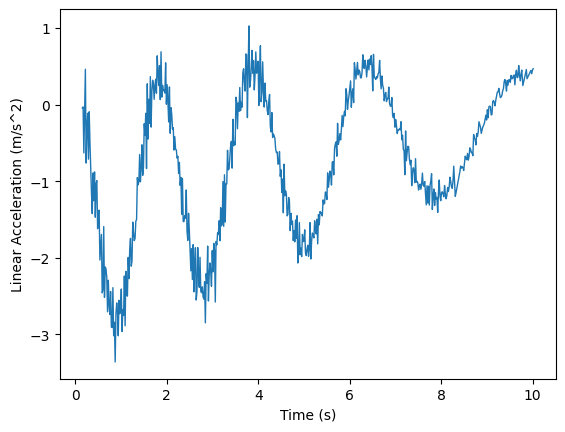

In [101]:
plt.plot(data['Time (s)'], data['Linear Acceleration x (m/s^2)'])
# plt.plot(data['Time (s)'], data['Linear Acceleration y (m/s^2)'])
# plt.plot(data['Time (s)'], data['Linear Acceleration z (m/s^2)'])

plt.xlabel('Time (s)')
plt.ylabel('Linear Acceleration (m/s^2)')
plt.setp(plt.gca().get_lines(), linewidth=1)

plt.show()

In [102]:
def low_pass_filter(data: pd.DataFrame) -> pd.DataFrame:
    data_filtered = data.rolling(window=5, min_periods=1, win_type='gaussian').mean(std=1.0)
    data_filtered['Time (s)'] = data['Time (s)']
    return data_filtered
def low_pass_filter2(data: pd.DataFrame) -> pd.DataFrame:
    data_filtered = data.rolling(window=5, min_periods=1).mean()
    data_filtered['Time (s)'] = data['Time (s)']
    return data_filtered

In [103]:
data_filtered = low_pass_filter(data)
data_filtered2 = low_pass_filter2(data)

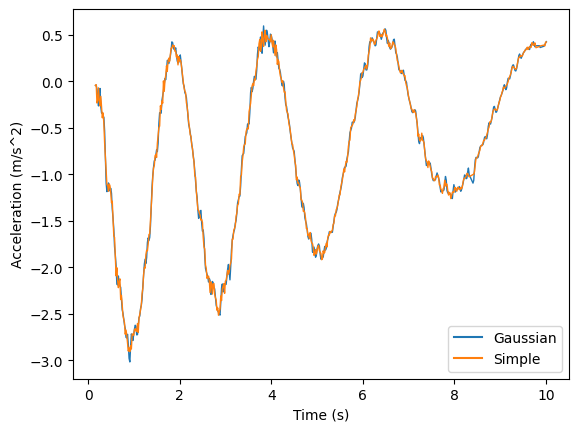

In [114]:
plt.plot(data_filtered['Time (s)'], data_filtered['Linear Acceleration x (m/s^2)'])
plt.plot(data_filtered2['Time (s)'], data_filtered2['Linear Acceleration x (m/s^2)'])

plt.legend(['Gaussian', 'Simple'])

plt.xlabel('Time (s)')
plt.ylabel('Acceleration (m/s^2)')
plt.setp(plt.gca().get_lines(), linewidth=1)

plt.show()

In [105]:
def integrate(data: pd.DataFrame) -> pd.DataFrame:
    data_integrated = data.cumsum()
    data_integrated['Time (s)'] = data['Time (s)']
    return data_integrated

In [106]:
velocities = integrate(data_filtered2)
positions = integrate(velocities)

unfiltered_velocities = integrate(data)
unfiltered_positions = integrate(unfiltered_velocities)


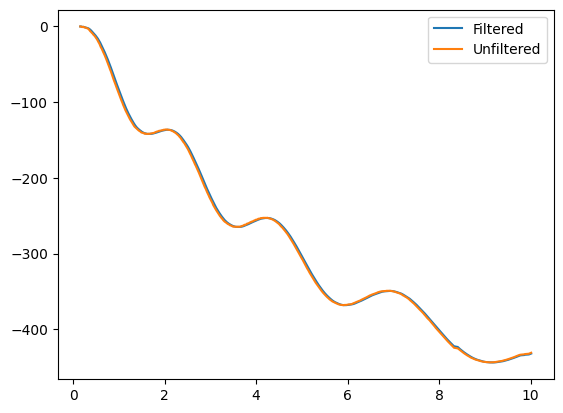

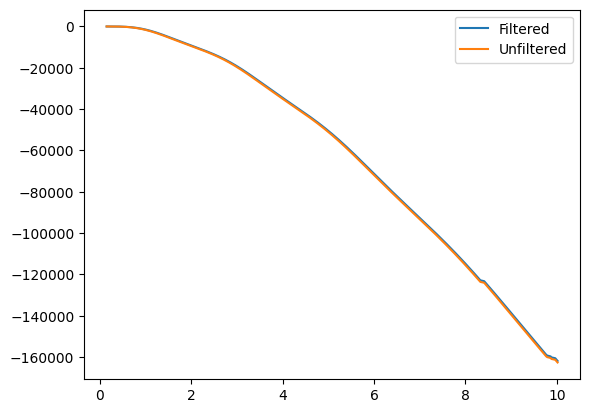

In [110]:
plt.plot(data['Time (s)'], velocities['Linear Acceleration x (m/s^2)'])
plt.plot(data['Time (s)'], unfiltered_velocities['Linear Acceleration x (m/s^2)'])

plt.legend(['Filtered', 'Unfiltered'])

plt.show()

plt.plot(data['Time (s)'], positions['Linear Acceleration x (m/s^2)'])
plt.plot(data['Time (s)'], unfiltered_positions['Linear Acceleration x (m/s^2)'])

plt.legend(['Filtered', 'Unfiltered'])


plt.show()

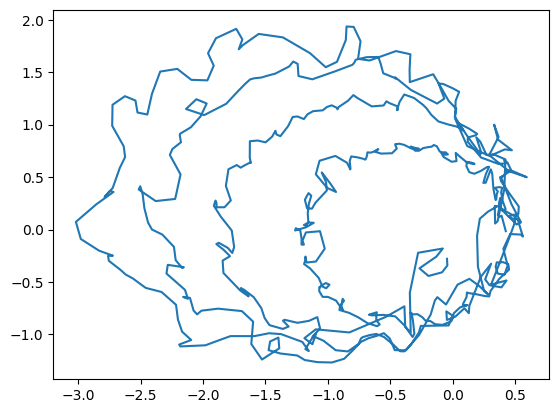

In [108]:
plt.plot(data_filtered["Linear Acceleration x (m/s^2)"], data_filtered["Linear Acceleration y (m/s^2)"])